In [124]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [125]:
def generate_csv(symbol,filename):
    current_date=datetime.datetime.now()
    start_date=datetime.datetime(current_date.year-2,1,1)
    df = pdr.get_data_yahoo(symbol,start_date,current_date).reset_index()
    df.to_csv(filename)

In [134]:
all_url = "all.csv"
generate_csv('ALL',all_url)
csco_url = "CSCO.csv"
generate_csv("CSCO",csco_url)

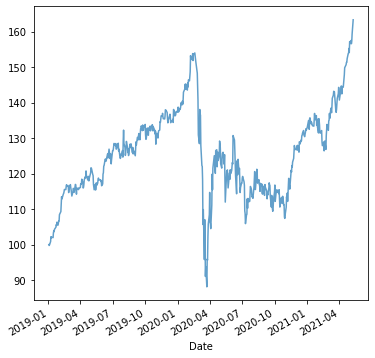

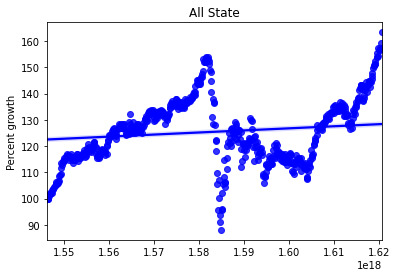

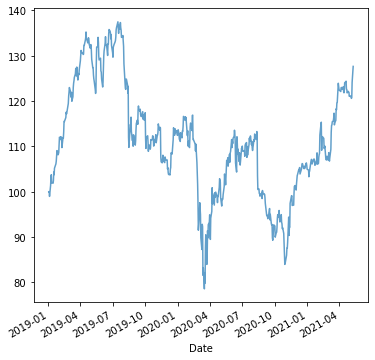

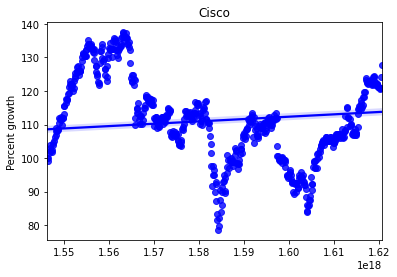

In [138]:
all_df=pd.read_csv(all_url,parse_dates=['Date'],index_col='Date')
csco_df =pd.read_csv(csco_url,parse_dates=['Date'],index_col='Date')
#df['Open'].plot()
fig,ax=plt.subplots(figsize=(6,6))
all_df['All']=all_df['Open'].div(all_df['Open'].iloc[0]).mul(100)
all_df['All'].plot(ax=ax,alpha=.7)
plt.show()
sns.regplot(x=np.asarray(all_df.index).astype(float),y="All",data=all_df,color='blue')
plt.ylabel("Percent growth")
plt.title("All State")
plt.show()

fig,ax=plt.subplots(figsize=(6,6))
csco_df['All']=csco_df['Open'].div(csco_df['Open'].iloc[0]).mul(100)
csco_df['All'].plot(ax=ax,alpha=.7)
plt.show()
sns.regplot(x=np.asarray(csco_df.index).astype(float),y="All",data=csco_df,color='blue')
plt.ylabel("Percent growth")
plt.title("Cisco")
plt.show()

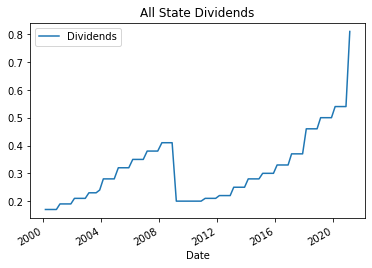

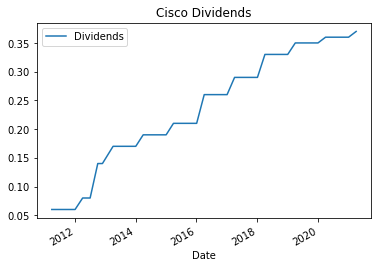

In [144]:
all_dividend_df=pd.read_csv('all_state_dividend.csv',parse_dates=['Date'],index_col='Date')

all_dividend_df.plot()
plt.title('All State Dividends')
plt.show()

csco_dividend_df=pd.read_csv('csco_dividends.csv',parse_dates=['Date'],index_col='Date')
csco_dividend_df.plot()
plt.title('Cisco Dividends')
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


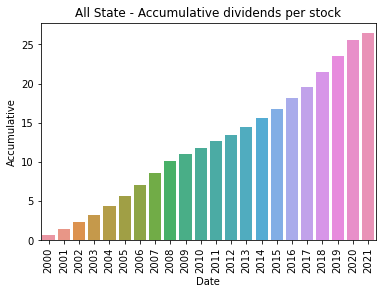

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


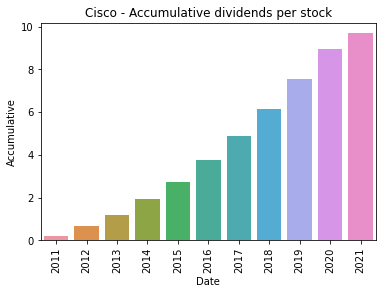

In [147]:
months=dividend_df.index.month
years=dividend_df.index.year
grouped=dividend_df.groupby([years,months])['Dividends'].sum()
grouped=grouped.unstack()

#print(grouped.values)
#print(grouped.index)
fp=dividend_df.pivot_table(index=dividend_df.index.year,columns=dividend_df.index.month,values=['Dividends'],aggfunc='sum')
fp['Totals'] = fp.sum(axis='columns')
fp['Accumulative']=fp['Totals'].cumsum()

sns.barplot(fp.index,fp['Accumulative'])
plt.xticks(rotation=90)
plt.title("All State - Accumulative dividends per stock")
plt.show()
#print(fp)


months=csco_dividend_df.index.month
years=csco_dividend_df.index.year
grouped=csco_dividend_df.groupby([years,months])['Dividends'].sum()
grouped=grouped.unstack()

#print(grouped.values)
#print(grouped.index)
fp=csco_dividend_df.pivot_table(index=csco_dividend_df.index.year,columns=csco_dividend_df.index.month,values=['Dividends'],aggfunc='sum')
fp['Totals'] = fp.sum(axis='columns')
fp['Accumulative']=fp['Totals'].cumsum()

sns.barplot(fp.index,fp['Accumulative'])
plt.xticks(rotation=90)
plt.title("Cisco - Accumulative dividends per stock")
plt.show()


#.plot()
#print(df['Open']*df['Open_PCT'])


#fp=pd.pivot_table(data=grouped,index=grouped.index,values=[grouped.values])
#print(fp)

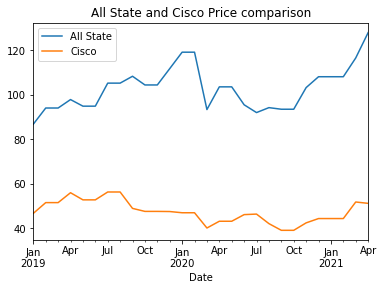

In [154]:
def stock_price_by_pct_chg(df):

    first_price=df['Open'].iloc[0]
    returns=df['Open'].pct_change()
    returns_plus_one = returns.add(1)
    accumulative=returns_plus_one.cumprod()
    accumulative=accumulative.mul(first_price)
    return accumulative

#first_price=all_df['Open'].iloc[0]
#allstate_returns=all_df['Open'].pct_change()
#allstate_returns_plus_one = allstate_returns.add(1)
#allstate_accumulative=allstate_returns_plus_one.cumprod()

#allstate_accumulative=allstate_accumulative.mul(first_price)

allstate_accumulative=stock_price_by_pct_chg(all_df)
csco_accumulative=stock_price_by_pct_chg(csco_df)

allstate_accumulative.asfreq('M').ffill().plot(label='All State')
csco_accumulative.asfreq('M').ffill().plot(label='Cisco')
plt.title('All State and Cisco Price comparison')
plt.legend()
plt.show()

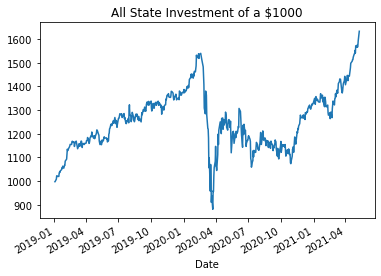

In [156]:
investment=1000
df_returns=all_df['Open'].pct_change()
df_returns_plus_one = df_returns.add(1)
df_cumulative_return = df_returns_plus_one.cumprod()
df_cumulative_return.mul(investment).plot()
plt.title("All State Investment of a $1000")
plt.show()

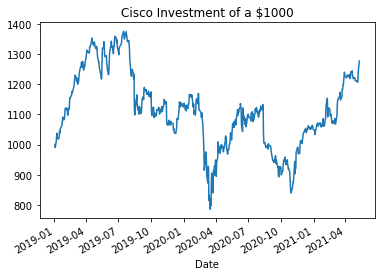

In [157]:
investment=1000
df_returns=csco_df['Open'].pct_change()
df_returns_plus_one = df_returns.add(1)
df_cumulative_return = df_returns_plus_one.cumprod()
df_cumulative_return.mul(investment).plot()
plt.title("Cisco Investment of a $1000")
plt.show()